In [5]:
# Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [360]:
# step 2: Load the datasets
dataset = pd.read_csv(r"C:\Users\USER\Downloads\Customers.csv")
dataset = pd.read_csv(r"C:\Users\USER\Downloads\Products.csv")
dataset = pd.read_csv(r"C:\Users\USER\Downloads\Transactions.csv")

In [12]:
dataset.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [14]:
dataset.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [16]:
dataset.shape

(200, 4)

In [18]:
dataset.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [20]:
dataset.describe

<bound method NDFrame.describe of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

In [22]:
dataset.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

<Axes: xlabel='CustomerName'>

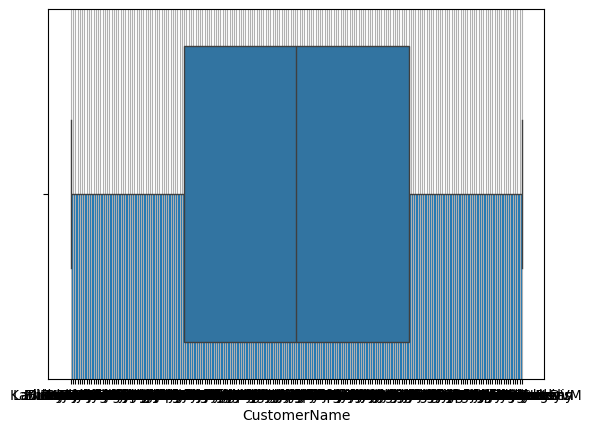

In [32]:
# step 3: Visualize Data

# Numerical features: Use histograms, box plots, or density plots to understand the distribution.
dataset['CustomerName'].hist()
sns.boxplot(x='CustomerName', data=dataset)

In [40]:
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A']}
dataset = pd.DataFrame(data)

<Axes: xlabel='Category', ylabel='count'>

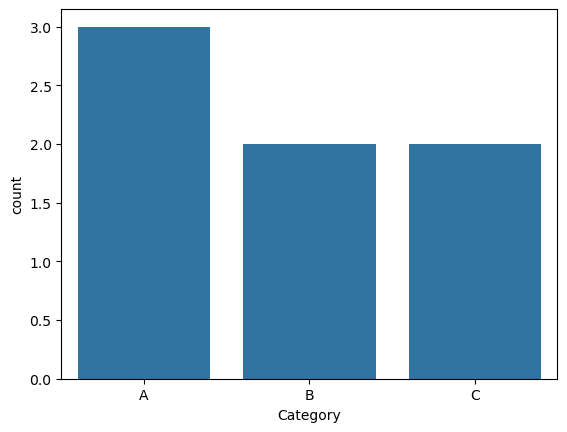

In [42]:
# Categorical features:
sns.countplot(x='Category', data=dataset)

In [52]:
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
        'Region': ['Asia', 'Europe', 'Asia', 'South America', 'Europe', 'Asia', 'South America']}

dataset = pd.DataFrame(data)
print(dataset)


  Category         Region
0        A           Asia
1        B         Europe
2        A           Asia
3        C  South America
4        B         Europe
5        C           Asia
6        A  South America


<Axes: xlabel='Region', ylabel='count'>

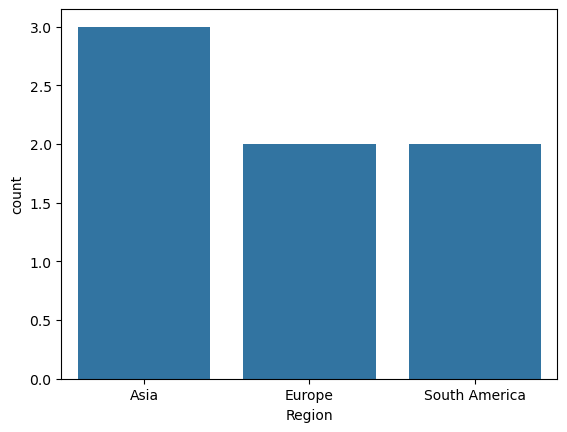

In [56]:
sns.countplot(x='Region', data=dataset)

In [68]:
print(dataset.select_dtypes(include=['number']).columns)

Index([], dtype='object')


In [70]:
print(dataset.dtypes)

Category    object
Region      object
dtype: object


In [82]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.dropna()
numeric_data = numeric_data.fillna(numeric_data.mean())

In [88]:
print(numeric_data.shape)

if numeric_data.empty:
    print("No numeric data available for correlation.")

(7, 0)
No numeric data available for correlation.


In [90]:
# Bivariate analysis:

if not numeric_data.empty:
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.show()

In [114]:
print(dataset.columns)

Index(['Category', 'Region'], dtype='object')


In [116]:
dataset.columns = dataset.columns.str.strip()  

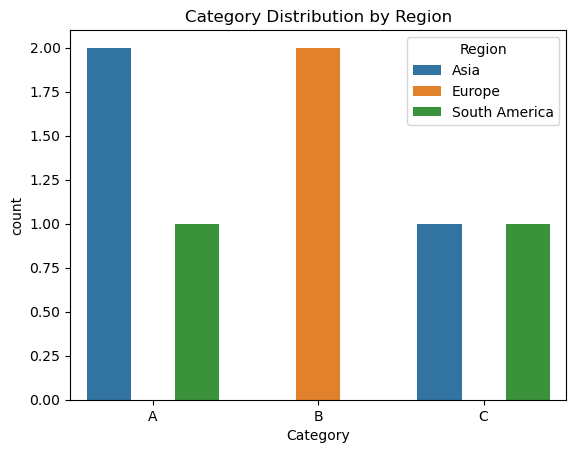

In [112]:
sns.countplot(x='Category', hue='Region', data=dataset)
plt.title('Category Distribution by Region')
plt.show()

In [134]:
print(dataset.dtypes)

Category    object
Region      object
dtype: object


In [144]:
print(dataset.columns)


Index(['Category', 'Region'], dtype='object')


In [164]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the mean of each column
dataset[numeric_columns] = dataset[numeric_cols].fillna(dataset[numeric_columns].mean())

# If needed, handle non-numeric columns (e.g., fill with 'Unknown' for strings)
non_numeric_columns = dataset.select_dtypes(exclude=['number']).columns
dataset[non_numeric_columns] = dataset[non_numeric_columns].fillna('Unknown')

# Optional: Drop rows with NaN values if necessary
dataset.dropna(inplace=True)

In [170]:
print(dataset.head())

  Category         Region
0        A           Asia
1        B         Europe
2        A           Asia
3        C  South America
4        B         Europe


In [172]:
# Step 1: Fill missing values in numeric columns with their mean
numeric_columns = dataset.select_dtypes(include=['number']).columns  # Only numeric columns
dataset[numeric_columns] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Step 2: Fill missing values in non-numeric columns with a placeholder value
non_numeric_columns = dataset.select_dtypes(exclude=['number']).columns  # Non-numeric columns
dataset[non_numeric_columns] = dataset[non_numeric_columns].fillna('Unknown')

# Step 3: If desired, drop rows with any remaining NaN values
dataset.dropna(inplace=True)  # This is optional and depends on your use case

# Step 4: Verify the result
print(dataset.head())

  Category         Region
0        A           Asia
1        B         Europe
2        A           Asia
3        C  South America
4        B         Europe


In [180]:
# Check column data types
print(dataset.dtypes)

# Check for non-numeric columns with unexpected data
for col in dataset.columns:
    if not pd.api.types.is_numeric_dtype(dataset[col]):
        print(f"Non-numeric column: {col}")
        print(dataset[col].unique())  # Print unique values for inspection


Category    object
Region      object
dtype: object
Non-numeric column: Category
['A' 'B' 'C']
Non-numeric column: Region
['Asia' 'Europe' 'South America']


In [194]:
dataset['Region'] = dataset['Region'].fillna('NaNs')  # Replace NaNs with 'NaNs'
dataset.loc[:, 'Region'] = dataset['Region'].fillna('NaNs')


In [186]:
# Print column names to check
print(dataset.columns)

# Handle missing values
numeric_cols = dataset.select_dtypes(include=['number']).columns
non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns

# Fill numeric columns with mean
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Fill non-numeric columns with 'Unknown'
dataset[non_numeric_cols] = dataset[non_numeric_cols].fillna('Unknown')

# Verify results
print(dataset)


Index(['Category', 'Region'], dtype='object')
  Category         Region
0        A           Asia
1        B         Europe
2        A           Asia
3        C  South America
4        B         Europe
5        C           Asia
6        A  South America


In [196]:
# Sample data
data = {
    'Region': ['Asia', None, 'Europe', None],
    'Sales': [100, 200, None, 400]
}
dataset = pd.DataFrame(data)

# Correct way to handle missing values in 'Region'
dataset['Region'] = dataset['Region'].fillna('NaNs')

print(dataset)


   Region  Sales
0    Asia  100.0
1    NaNs  200.0
2  Europe    NaN
3    NaNs  400.0


In [200]:
print(dataset['Region'])  # Replace 'Region' with the actual column name.


0      Asia
1      NaNs
2    Europe
3      NaNs
Name: Region, dtype: object


In [202]:
print(dataset['Region'].dtype)


object


In [208]:
dataset['Region'] = dataset['Region'].fillna(dataset['Region'].mean())
# Example for numeric column
dataset['Region'] = pd.to_numeric(dataset['Region'], errors='coerce')  # Ensure it's numeric
mean_value = dataset['Region'].mean()  # Calculate the mean
dataset['Region'] = dataset['Region'].fillna(mean_value)  # Replace NaNs with the mean



In [216]:
print(dataset['Region'].head(10))
print(dataset['Region'].isnull().sum())  # Count of NaN values


0   NaN
1   NaN
2   NaN
3   NaN
Name: Region, dtype: float64
4


In [218]:
print(dataset['Region'].mode())


Series([], Name: Region, dtype: float64)


In [220]:
if not dataset['Region'].mode().empty:
    most_frequent = dataset['Region'].mode()[0]  # Get the most frequent value
    dataset['Region'] = dataset['Region'].fillna(most_frequent)
else:
    print("No mode found for the 'Region' column. Filling with 'Unknown'.")
    dataset['Region'] = dataset['Region'].fillna('Unknown')


No mode found for the 'Region' column. Filling with 'Unknown'.


In [222]:
dataset['Region'] = dataset['Region'].fillna('Unknown')


In [224]:
# Check the column data
print("Preview of 'Region' column:")
print(dataset['Region'].head(10))

# Check if column contains NaNs
nan_count = dataset['Region'].isnull().sum()
print(f"Number of NaN values: {nan_count}")

# Handle mode calculation
if not dataset['Region'].mode().empty:
    most_frequent = dataset['Region'].mode()[0]
    dataset['Region'] = dataset['Region'].fillna(most_frequent)
    print(f"Filled NaNs with the mode: {most_frequent}")
else:
    print("No mode found. Filling with 'Unknown'.")
    dataset['Region'] = dataset['Region'].fillna('Unknown')


Preview of 'Region' column:
0    Unknown
1    Unknown
2    Unknown
3    Unknown
Name: Region, dtype: object
Number of NaN values: 0
Filled NaNs with the mode: Unknown


In [228]:
most_frequent = dataset['Region'].mode()[0]
dataset['Region'] = dataset['Region'].fillna(most_frequent)
dataset['Region'] = dataset['Region'].fillna('Unknown')


In [230]:
# Check data type of the column
print(dataset['Region'].dtype)

# Handle non-numeric values
if dataset['Region'].dtype == 'object':
    # Convert to numeric, replacing invalid entries with NaN
    dataset['Region'] = pd.to_numeric(dataset['Region'], errors='coerce')

# Fill missing values (if column is numeric)
if pd.api.types.is_numeric_dtype(dataset['Region']):
    mean_value = dataset['Region'].mean()
    dataset['Region'] = dataset['Region'].fillna(mean_value)
else:
    # For non-numeric, fill with 'Unknown' or the mode
    dataset['Region'] = dataset['Region'].fillna('Unknown')


object


In [232]:
# step 4: Data cleaning

dataset.fillna(dataset.mean(), inplace=True)  
dataset.dropna(inplace=True)

In [248]:
# Check the data types of columns
print(dataset.dtypes)

# Check if 'Sales' column has non-numeric values
print(dataset['Sales'].unique())


Region    float64
Sales     float64
dtype: object
[]


In [258]:
# Convert non-numeric values to NaN and then fill or drop them
dataset['Sales'] = pd.to_numeric(dataset['Sales'], errors='coerce')
dataset['Sales'] = dataset['Sales'].fillna(dataset['Sales'].mean())  # Or use dropna if you'd rather remove them


In [262]:
print(dataset['Sales'].isnull().sum())  # Check if there are any missing values


0


In [264]:
print(len(dataset['Sales']))  # Check the number of values in the 'Sales' column


0


In [272]:
print(len(dataset))  # Check the number of rows in the dataset


0


In [280]:
print(dataset[['Sales']].shape)  # Verify if 'Sales' has rows


(0, 1)


In [282]:
print(dataset['Sales'].head())  # Check the first few rows of the 'Sales' column


Series([], Name: Sales, dtype: float64)


In [288]:
print(dataset.columns)  # Confirm if 'Sales' is still part of the dataset


Index(['Region', 'Sales'], dtype='object')


In [292]:
# Check if the 'Sales' column has any valid data
print(dataset['Sales'].dropna().shape)


(0,)


In [298]:
sales_data = dataset['Sales'].dropna().values.reshape(-1, 1)  # Remove NaN and reshape to 2D
print(sales_data[:10])  # Display the first 10 values

# Check shape after reshaping
print(sales_data.shape)


[]
(0, 1)


In [300]:
print(f"Missing values in 'Sales': {dataset['Sales'].isna().sum()}")


Missing values in 'Sales': 0


In [302]:
print(dataset.shape)  # Check if there are rows in the dataset


(0, 2)


In [306]:
print(dataset['Sales'].isna().sum())  # Count missing values in 'Sales'


0


In [308]:
print(dataset['Sales'].head())  # Print first few rows of the 'Sales' column


Series([], Name: Sales, dtype: float64)


In [312]:
dataset['Sales'] = dataset['Sales'].replace(np.nan, 0)  # Replace NaN with 0 or any other value
dataset['Sales'] = dataset['Sales'].fillna(dataset['Sales'].mean())  # Replace NaN with mean of 'Sales'

In [320]:
print(dataset['Sales'].isna().sum())  # Count missing values in 'Sales'
print(dataset['Sales'].head())  # View first few entries in the 'Sales' column
print(dataset.shape)  # Confirm dataset has rows and columns


0
Series([], Name: Sales, dtype: float64)
(0, 2)
